<a href="https://colab.research.google.com/github/Heba2424/DEPI_Projects/blob/main/Heartbeat_Categorization_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECG Heartbeat Categorization**

**Problem Undestanding**

**The Problem: Heartbeat Classification**

**Dataset** : "Arrhythmia Dataset"
- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
classes = {0:'Normal beat',
           1:'Supraventricular premature beat',
           2:'Premature ventricular contraction',
           3:"Fusion of ventricular and normal beat",
           4:'Unclassifiable beat'}

#Data Loading

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 98% 97.0M/98.8M [00:02<00:00, 43.8MB/s]
100% 98.8M/98.8M [00:02<00:00, 34.6MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
import pandas as pd
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 188 columns in our Dataset.
the last column is the label

#EDA

In [ ]:
# Display basic information about the dataset
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
# Check for missing values
train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

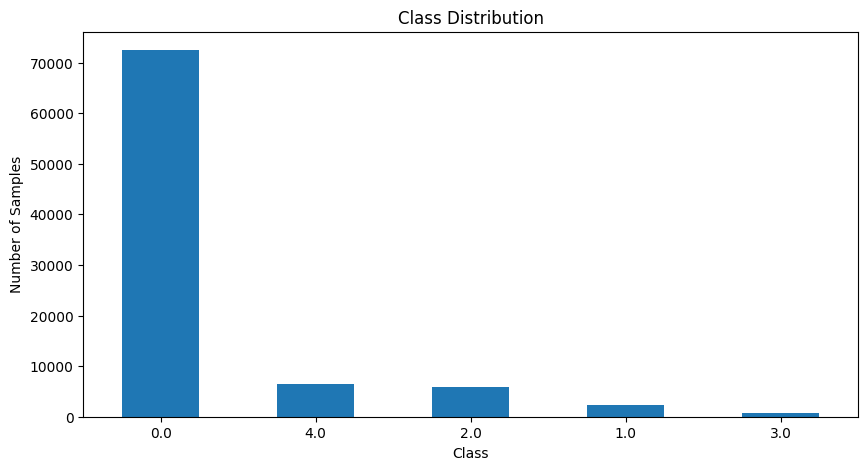

In [ ]:
import matplotlib.pyplot as plt

# The class labels are assumed to be in the last column
class_distribution = train.iloc[:, -1].value_counts()

plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


In [ ]:
train.iloc[:, :-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


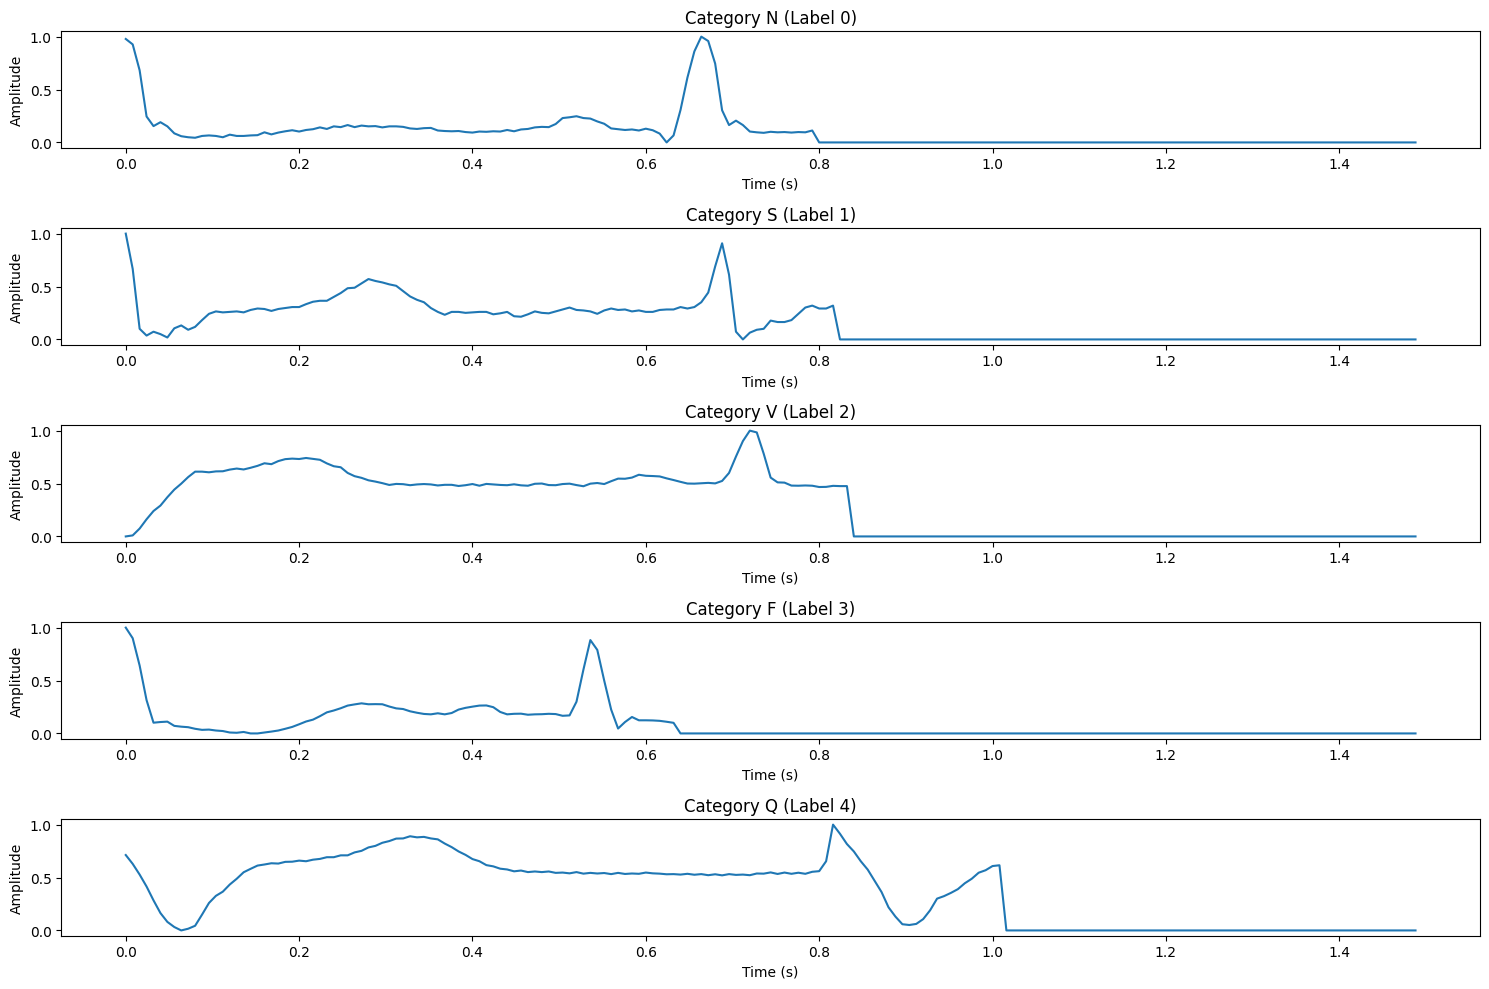

In [ ]:
import numpy as np

# Define class labels
class_labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

fig, axes = plt.subplots(len(class_labels), 1, figsize=(15, 10))

for i, (class_num, class_name) in enumerate(class_labels.items()):
    sample = train[train.iloc[:, -1] == class_num].iloc[0, :-1].values
    time = np.arange(len(sample)) / 125  # Assuming sampling rate is 125 Hz
    axes[i].plot(time, sample)
    axes[i].set_title(f'Category {class_name} (Label {class_num})')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  warnings.warn('nperseg = {0:d} is greater than input length '


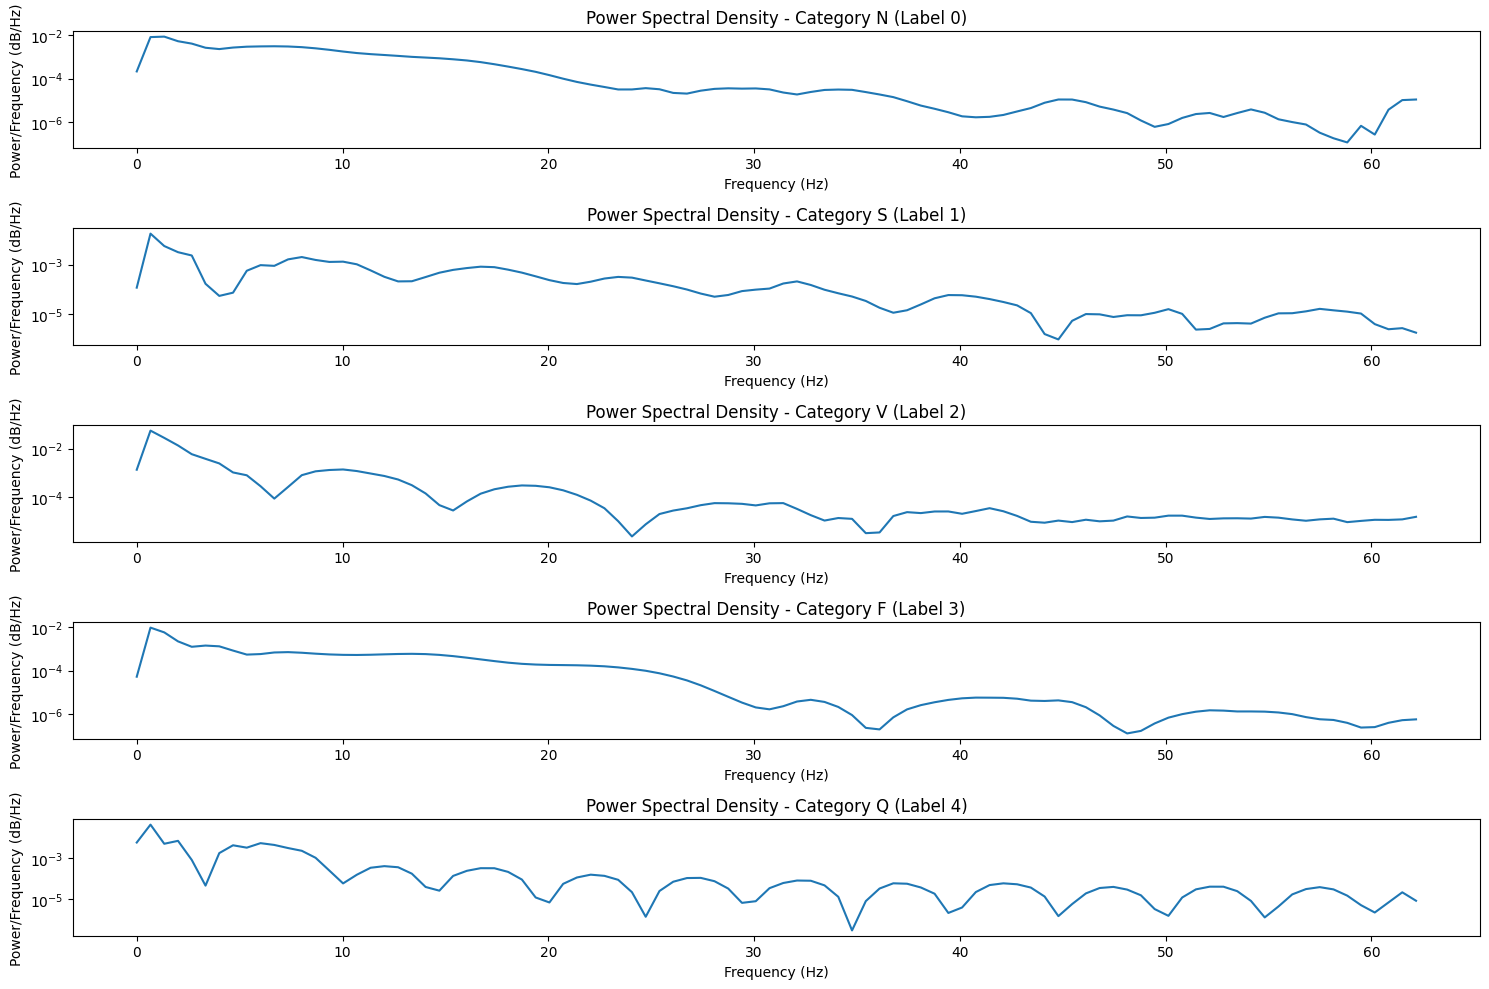

In [ ]:
from scipy.signal import welch

fig, axes = plt.subplots(len(class_labels), 1, figsize=(15, 10))

for i, (class_num, class_name) in enumerate(class_labels.items()):
    sample = train[train.iloc[:, -1] == class_num].iloc[0, :-1].values
    freqs, psd = welch(sample, 125)  # Compute the power spectral density (PSD)
    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Power Spectral Density - Category {class_name} (Label {class_num})')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power/Frequency (dB/Hz)')

plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [ ]:
train.isnull().values.any()

False

In [ ]:
# Split the training data into features (X_train) and labels (y_train)
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

# Split the test data into features (X_test) and labels (y_test)
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87554, 187)
y_train shape: (87554,)
X_test shape: (21892, 187)
y_test shape: (21892,)


In [ ]:
X_train.shape[1]

187

In [ ]:
y_train.shape

(87554,)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.97)  # Keep enough components to explain 97% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca.shape[1]

52

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [ ]:
y_train_cat.shape

(87554, 5)

In [ ]:
# to solve imblanced problem
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)


Class weights: {0: 0.24162492583240192, 1: 7.877103013945119, 2: 3.0253628196268143, 3: 27.317940717628705, 4: 2.7228735810915876}


#Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2



model = Sequential([
    Dense(100, input_shape=(X_train_pca.shape[1],), activation='relu' ),
    Dense(40, activation='relu' ),
    Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 150)               7950      
                                                                 
 dense_16 (Dense)            (None, 80)                12080     
                                                                 
 dense_17 (Dense)            (None, 5)                 405       
                                                                 
Total params: 20435 (79.82 KB)
Trainable params: 20435 (79.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training

In [ ]:
# Train the model
history = model.fit(X_train_pca, y_train_cat, epochs=30, batch_size=36, validation_split=0.2 ,
                    validation_data=(X_test_pca, y_test_cat),
                    class_weight=class_weights_dict,
                    verbose=1)

Epoch 1/30
2433/2433 [==============================] - 12s 5ms/step - loss: 0.4943 - accuracy: 0.7766 - val_loss: 0.4600 - val_accuracy: 0.8340
Epoch 2/30
2433/2433 [==============================] - 8s 3ms/step - loss: 0.3211 - accuracy: 0.8526 - val_loss: 0.3762 - val_accuracy: 0.8623
Epoch 3/30
2433/2433 [==============================] - 11s 5ms/step - loss: 0.2600 - accuracy: 0.8835 - val_loss: 0.3146 - val_accuracy: 0.8916
Epoch 4/30
2433/2433 [==============================] - 9s 4ms/step - loss: 0.2255 - accuracy: 0.8940 - val_loss: 0.3191 - val_accuracy: 0.8878
Epoch 5/30
2433/2433 [==============================] - 10s 4ms/step - loss: 0.1981 - accuracy: 0.9041 - val_loss: 0.3361 - val_accuracy: 0.8820
Epoch 6/30
2433/2433 [==============================] - 11s 4ms/step - loss: 0.1795 - accuracy: 0.9086 - val_loss: 0.2293 - val_accuracy: 0.9197
Epoch 7/30
2433/2433 [==============================] - 9s 4ms/step - loss: 0.1582 - accuracy: 0.9213 - val_loss: 0.5260 - val_accur

#Evaluation

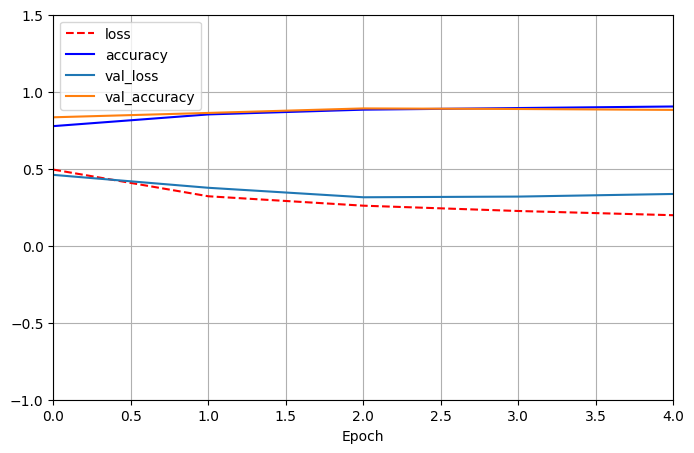

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 4], ylim=[-1, 1.5], grid=True, xlabel="Epoch",
    style=["r--", "b-"])
plt.show()

In [ ]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test_pca)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

685/685 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9611730312442901


confmat_sgd =>
 [[17512   295   136   116    59]
 [   91   447    14     3     1]
 [   35    11  1352    40    10]
 [   11     0     9   142     0]
 [    9     5     5     0  1589]]


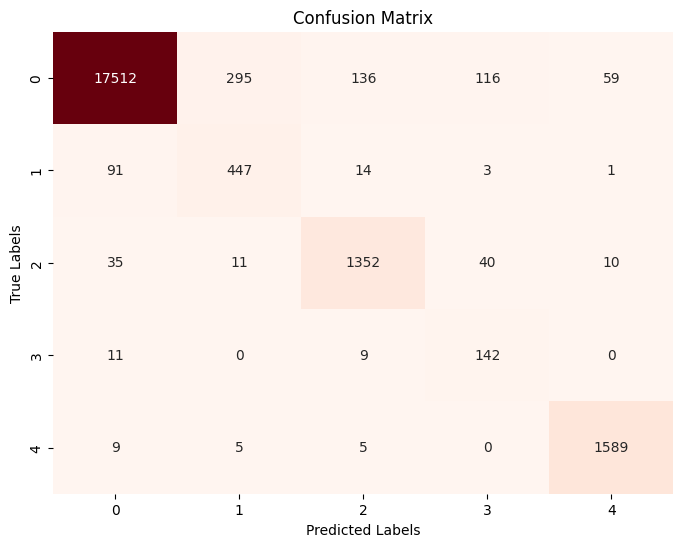

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('confmat_sgd =>\n', conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='weighted')
recall_score_value = recall_score(y_test_cat, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_score_value)
print("F1-Score:", f1)

Accuracy: 0.9611730312442901
Precision: 0.9685733875917674
Recall: 0.9611730312442901
F1-Score: 0.9638221742961093


In [ ]:
## Precision and Recall score
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='weighted')
recall = recall_score(y_test_cat, y_pred, average='weighted')
f1 = f1_score(y_test_cat, y_pred, average='weighted')


class_repo = classification_report(y_test, y_pred)
print('Classifcation Report => \n', class_repo)

Classifcation Report => 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.59      0.80      0.68       556
         2.0       0.89      0.93      0.91      1448
         3.0       0.47      0.88      0.61       162
         4.0       0.96      0.99      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.78      0.91      0.83     21892
weighted avg       0.97      0.96      0.96     21892

